<a href="https://colab.research.google.com/github/hyunwoo94/DataScience/blob/main/Unit14_numpy%EB%A5%BC_%ED%99%9C%EC%9A%A9%ED%95%9C_%EB%82%98%EB%A7%8C%EC%9D%98_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<알고리즘 설계> <br>
1. 데이터를 읽어온다.
2. 궁금한 지역의 이름을 입력 받는다.
3. 궁금한 지역의 인구 구조를 저장한다.
4. 궁금한 지역의 인구 구조와 가장 비슷한 인구 구조를 가진 지역을 찾는다.
5. 가장 비슷한 곳의 인구 구조와 궁금한 지역의 인구 구조를 시각화 한다.


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


1. 데이터를 읽어온다.


In [ ]:
import csv
f= open('age.csv', encoding='cp949')

data = csv.reader(f)

next(data) # 헤더 제거

for row in data:
  print(row)

2. 궁금한 지역의 이름을 입력 받는다.


In [ ]:
import csv
f= open('age.csv', encoding='cp949')

data = csv.reader(f)
next(data) # 헤더 제거

home = [] # 입력 받은 지역의 데이터를 저장할 리스트
name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해 주세요 : ')

for row in data:
  if name in row[0]:
    for i in row[3:]:
      home.append(int(i))

print(home)

인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해 주세요 : 신도림동
[326, 334, 406, 413, 389, 408, 417, 434, 411, 387, 420, 383, 354, 357, 340, 338, 349, 339, 407, 380, 390, 453, 424, 516, 451, 466, 448, 484, 471, 476, 558, 541, 579, 619, 638, 740, 756, 792, 745, 789, 671, 687, 700, 636, 726, 691, 657, 619, 649, 585, 579, 470, 522, 534, 563, 445, 511, 569, 572, 513, 532, 456, 426, 497, 379, 384, 399, 279, 289, 276, 268, 271, 223, 170, 150, 154, 177, 140, 126, 114, 121, 97, 86, 80, 59, 48, 44, 43, 28, 29, 22, 15, 13, 12, 5, 8, 5, 4, 2, 3, 7]


3. 궁금한 지역의 인구 구조를 저장한다.


In [ ]:
import csv
import numpy as np
f= open('age.csv', encoding='cp949')

data = csv.reader(f)
next(data) # 헤더 제거


name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해 주세요 : ')

for row in data:
  if name in row[0]:
    home = np.array(row[3:], dtype = int) #numpy 배열로 저장할 때 데이터 타입 int로 변환

print(home)


인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해 주세요 : 신도림동
[326 334 406 413 389 408 417 434 411 387 420 383 354 357 340 338 349 339
 407 380 390 453 424 516 451 466 448 484 471 476 558 541 579 619 638 740
 756 792 745 789 671 687 700 636 726 691 657 619 649 585 579 470 522 534
 563 445 511 569 572 513 532 456 426 497 379 384 399 279 289 276 268 271
 223 170 150 154 177 140 126 114 121  97  86  80  59  48  44  43  28  29
  22  15  13  12   5   8   5   4   2   3   7]


In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt

f= open('age.csv', encoding='cp949')

data = csv.reader(f)
next(data) # 헤더 제거

for row in data:
  if name in row[0]:
    for i in row[3:]:
      home = np.array(row[3:], dtype = int) #numpy 배열로 저장할 때 데이터 타입 int로 변환

  #데이터 시각화

plt.style.use('ggplot')
plt.figure(dpi=200)
plt.rc('font', family = 'NanumBarunGothic')
plt.title(name + ' 지역의 인구 구조')

plt.plot(home)
plt.show()

4. 궁금한 지역의 인구 구조와 가장 비슷한 인구 구조를 가진 지역을 찾는다.


*   전국의 모든 지역 중 한곳 (B)을 선택 한다.
*   궁금한 지역 A의 0세 인구수에서 B의 0세 인구수를 뺀다
*   100세 이상 인구수에 해당 하는 값까지 반복한 후 각각의 차이를 모두 더한다.
*   전국의 모든 지역에 대해 반복하며, 그 차이가 가장 작은 지역을 찾는다.


궁금한 지역 A의 0세 인구 비율에서 B의 0세 인구 비율을 뺀다.


In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt

f= open('age.csv', encoding='cp949')

data = csv.reader(f)
next(data) # 헤더 제거

data = list(data)  #추가

name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : ')

for row in data:
  if name in row[0]:
    home = np.array(row[3:], dtype=int) / int(row[2])

for row in data:
  away = np.array(row[3:], dtype=int) / int(row[2])
  
print(home-away)

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt

f= open('age.csv', encoding='cp949')

data = csv.reader(f)
next(data) # 헤더 제거

data = list(data)  #추가

name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : ')

for row in data:
  if name in row[0]:
    home = np.array(row[3:], dtype=int) / int(row[2])

for row in data:
  away = np.array(row[3:], dtype=int) / int(row[2])
  print(np.sum(home-away)) #  numpy.sum() 함수를 이용하여 각각의 차이 모두 더함

전국의 모든 지역에 대해 반복하여 그 차이가 가장 작은 지역을 찾고 시각화


인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : 신도림동


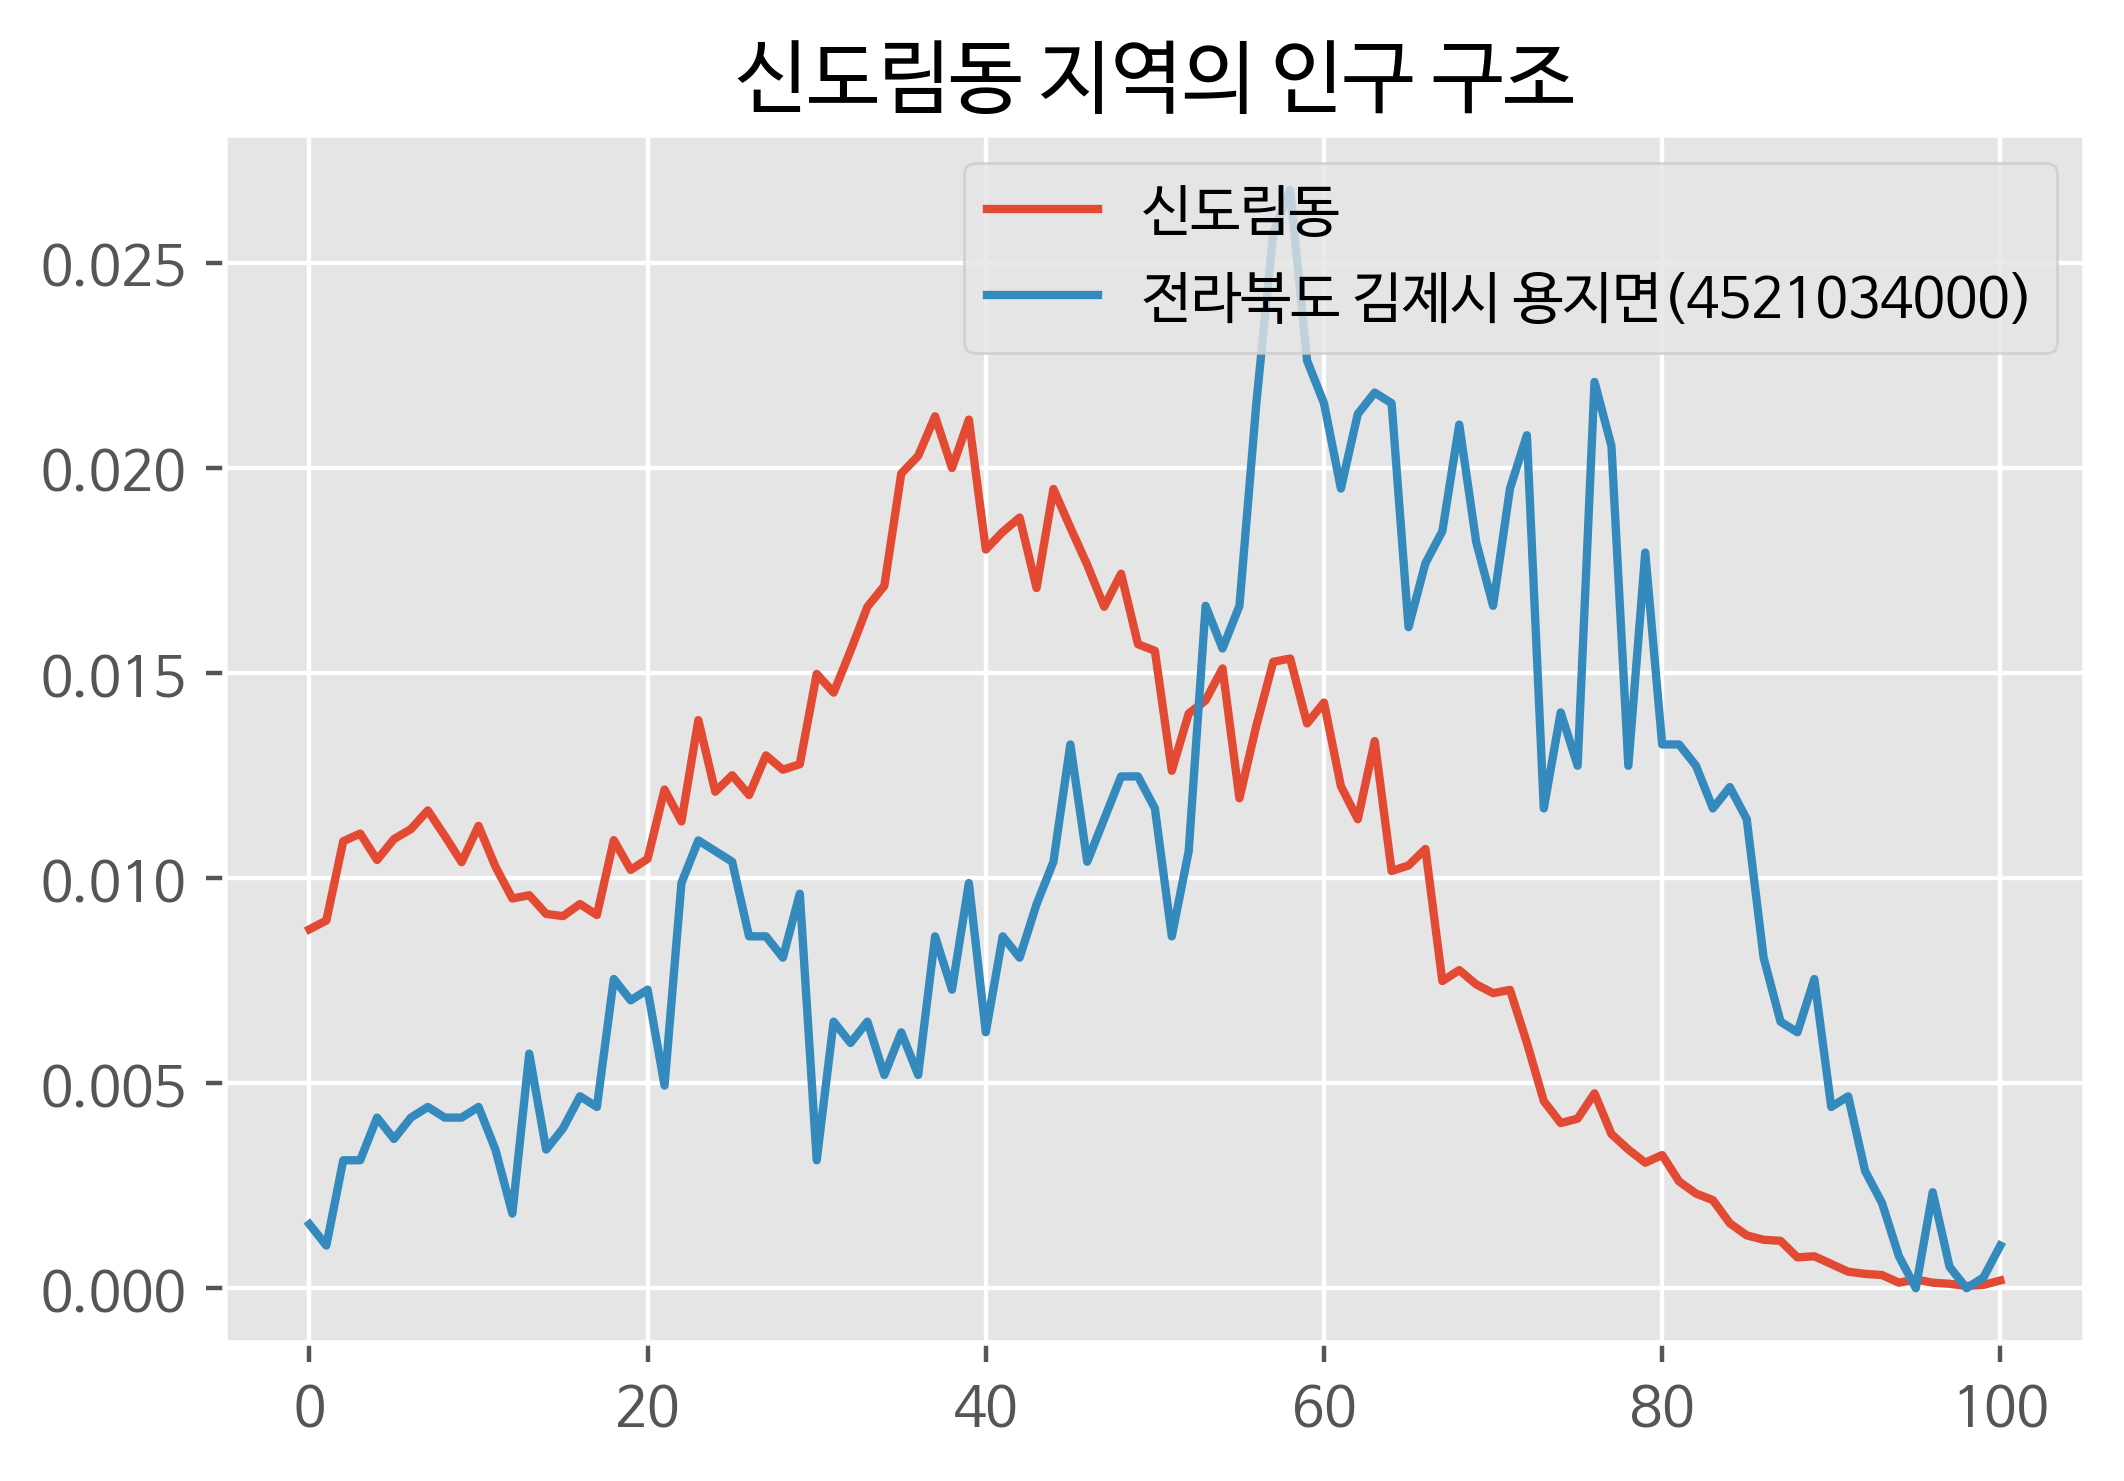

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt

f= open('age.csv', encoding='cp949')

data = csv.reader(f)
next(data) # 헤더 제거

data = list(data)  #추가

name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : ')

mn = 1
result_name = '' # 최솟값을 갖는 지역의 이름 저장할 변수 생성 및 초기화
result =0  # 최솟값을 갖는 지역의 연령대별 인구 비율 저장 할 변수 생성 및 초기화


for row in data:
  if name in row[0]:
    home = np.array(row[3:], dtype=int) / int(row[2])

for row in data:
  away = np.array(row[3:], dtype=int) / int(row[2])
  s = np.sum(home-away)
  if s<mn:
    mn=s
    result_name=row[0]
    result = away # 인구 비율 저장

 #데이터 시각화
plt.style.use('ggplot')
plt.figure(dpi=200)
plt.rc('font', family = 'NanumBarunGothic')
plt.title(name + ' 지역의 인구 구조')
plt.plot(home, label =name)
plt.plot(result, label =result_name)
plt.legend()
plt.show()

우리가 찾고 있었던 것은 인구 구조가 가장 비슷한 지역 -> 즉 연령대별 인구 비율과 분포가 비슷해야 함<br>
두 지역의 차이가 합한 값이 0에 가까울 수록 인구 구조가 비슷 -> 음수 값이 선택됨<br>
거듭제곱 연산자를 통해 음수를 양수로 변환 처리 추가


인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : 신도림동


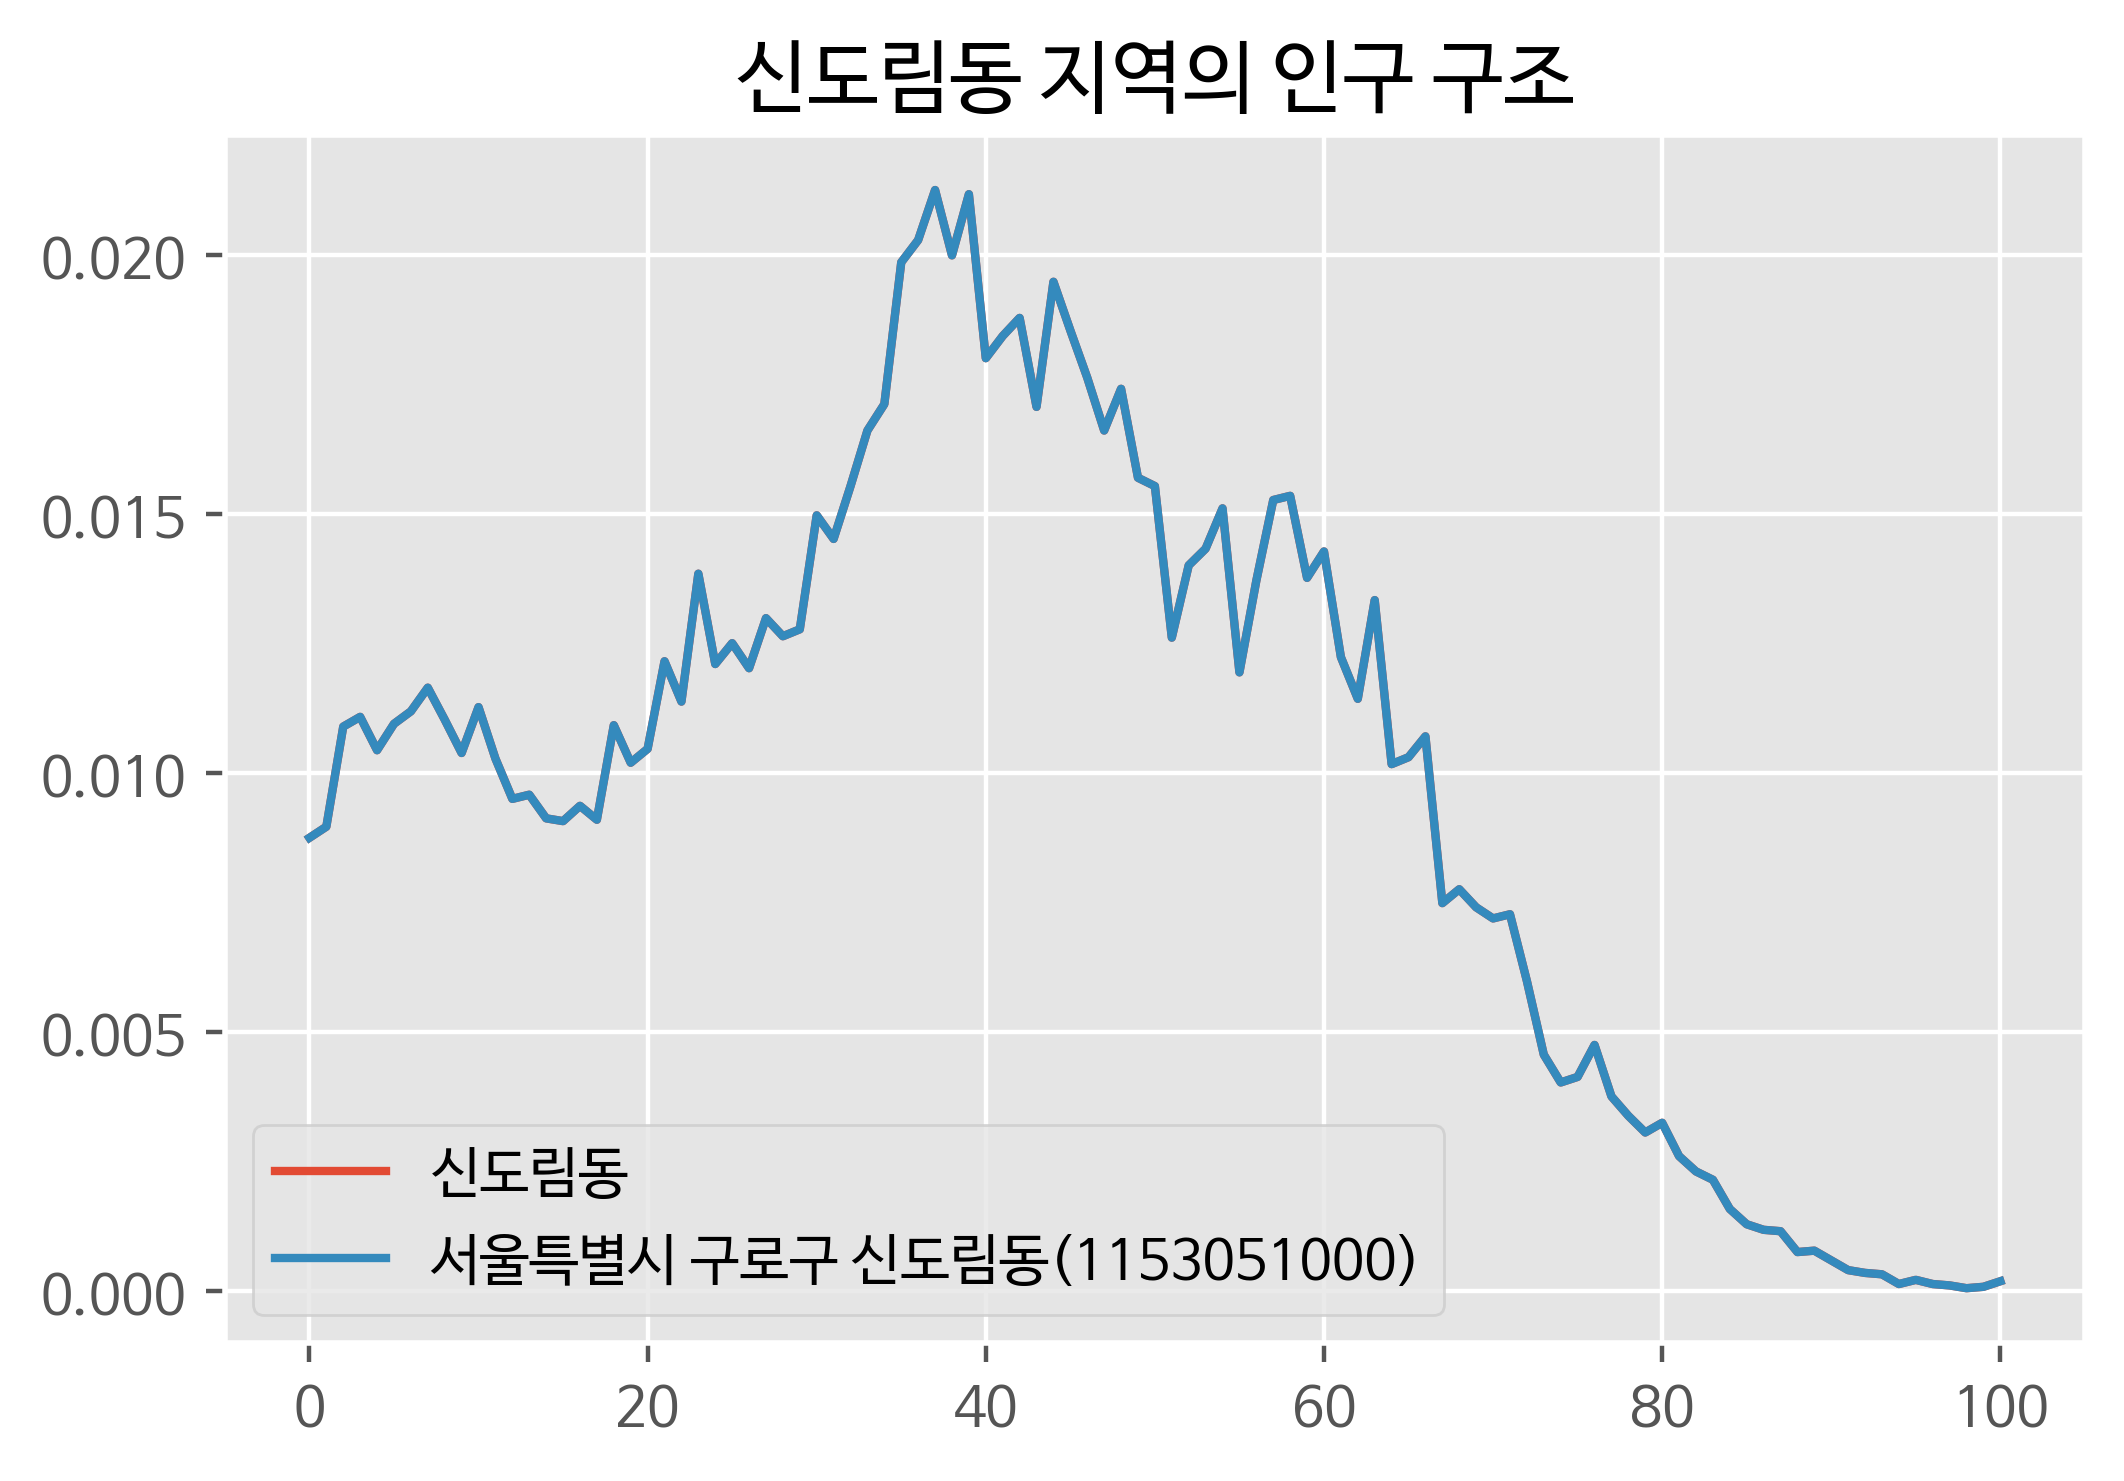

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt

f= open('age.csv', encoding='cp949')

data = csv.reader(f)
next(data) # 헤더 제거

data = list(data)  #추가

name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : ')

mn = 1  # 최솟값을 저장할 변수 생성 및 초기화
result_name = '' # 최솟값을 갖는 지역의 이름 저장할 변수 생성 및 초기화
result =0  # 최솟값을 갖는 지역의 연령대별 인구 비율 저장 할 변수 생성 및 초기화


for row in data:
  if name in row[0]:
    home = np.array(row[3:], dtype=int) / int(row[2])

for row in data:
  away = np.array(row[3:], dtype=int) / int(row[2])
  s = np.sum((home-away)**2) # 음수 -> 양수로 변환
  if s<mn:
    mn=s
    result_name=row[0]
    result = away # 인구 비율 저장

 #데이터 시각화
plt.style.use('ggplot')
plt.figure(dpi=200)
plt.rc('font', family = 'NanumBarunGothic')
plt.title(name + ' 지역의 인구 구조')
plt.plot(home, label =name)
plt.plot(result, label =result_name)
plt.legend()
plt.show()

인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : 역삼2동


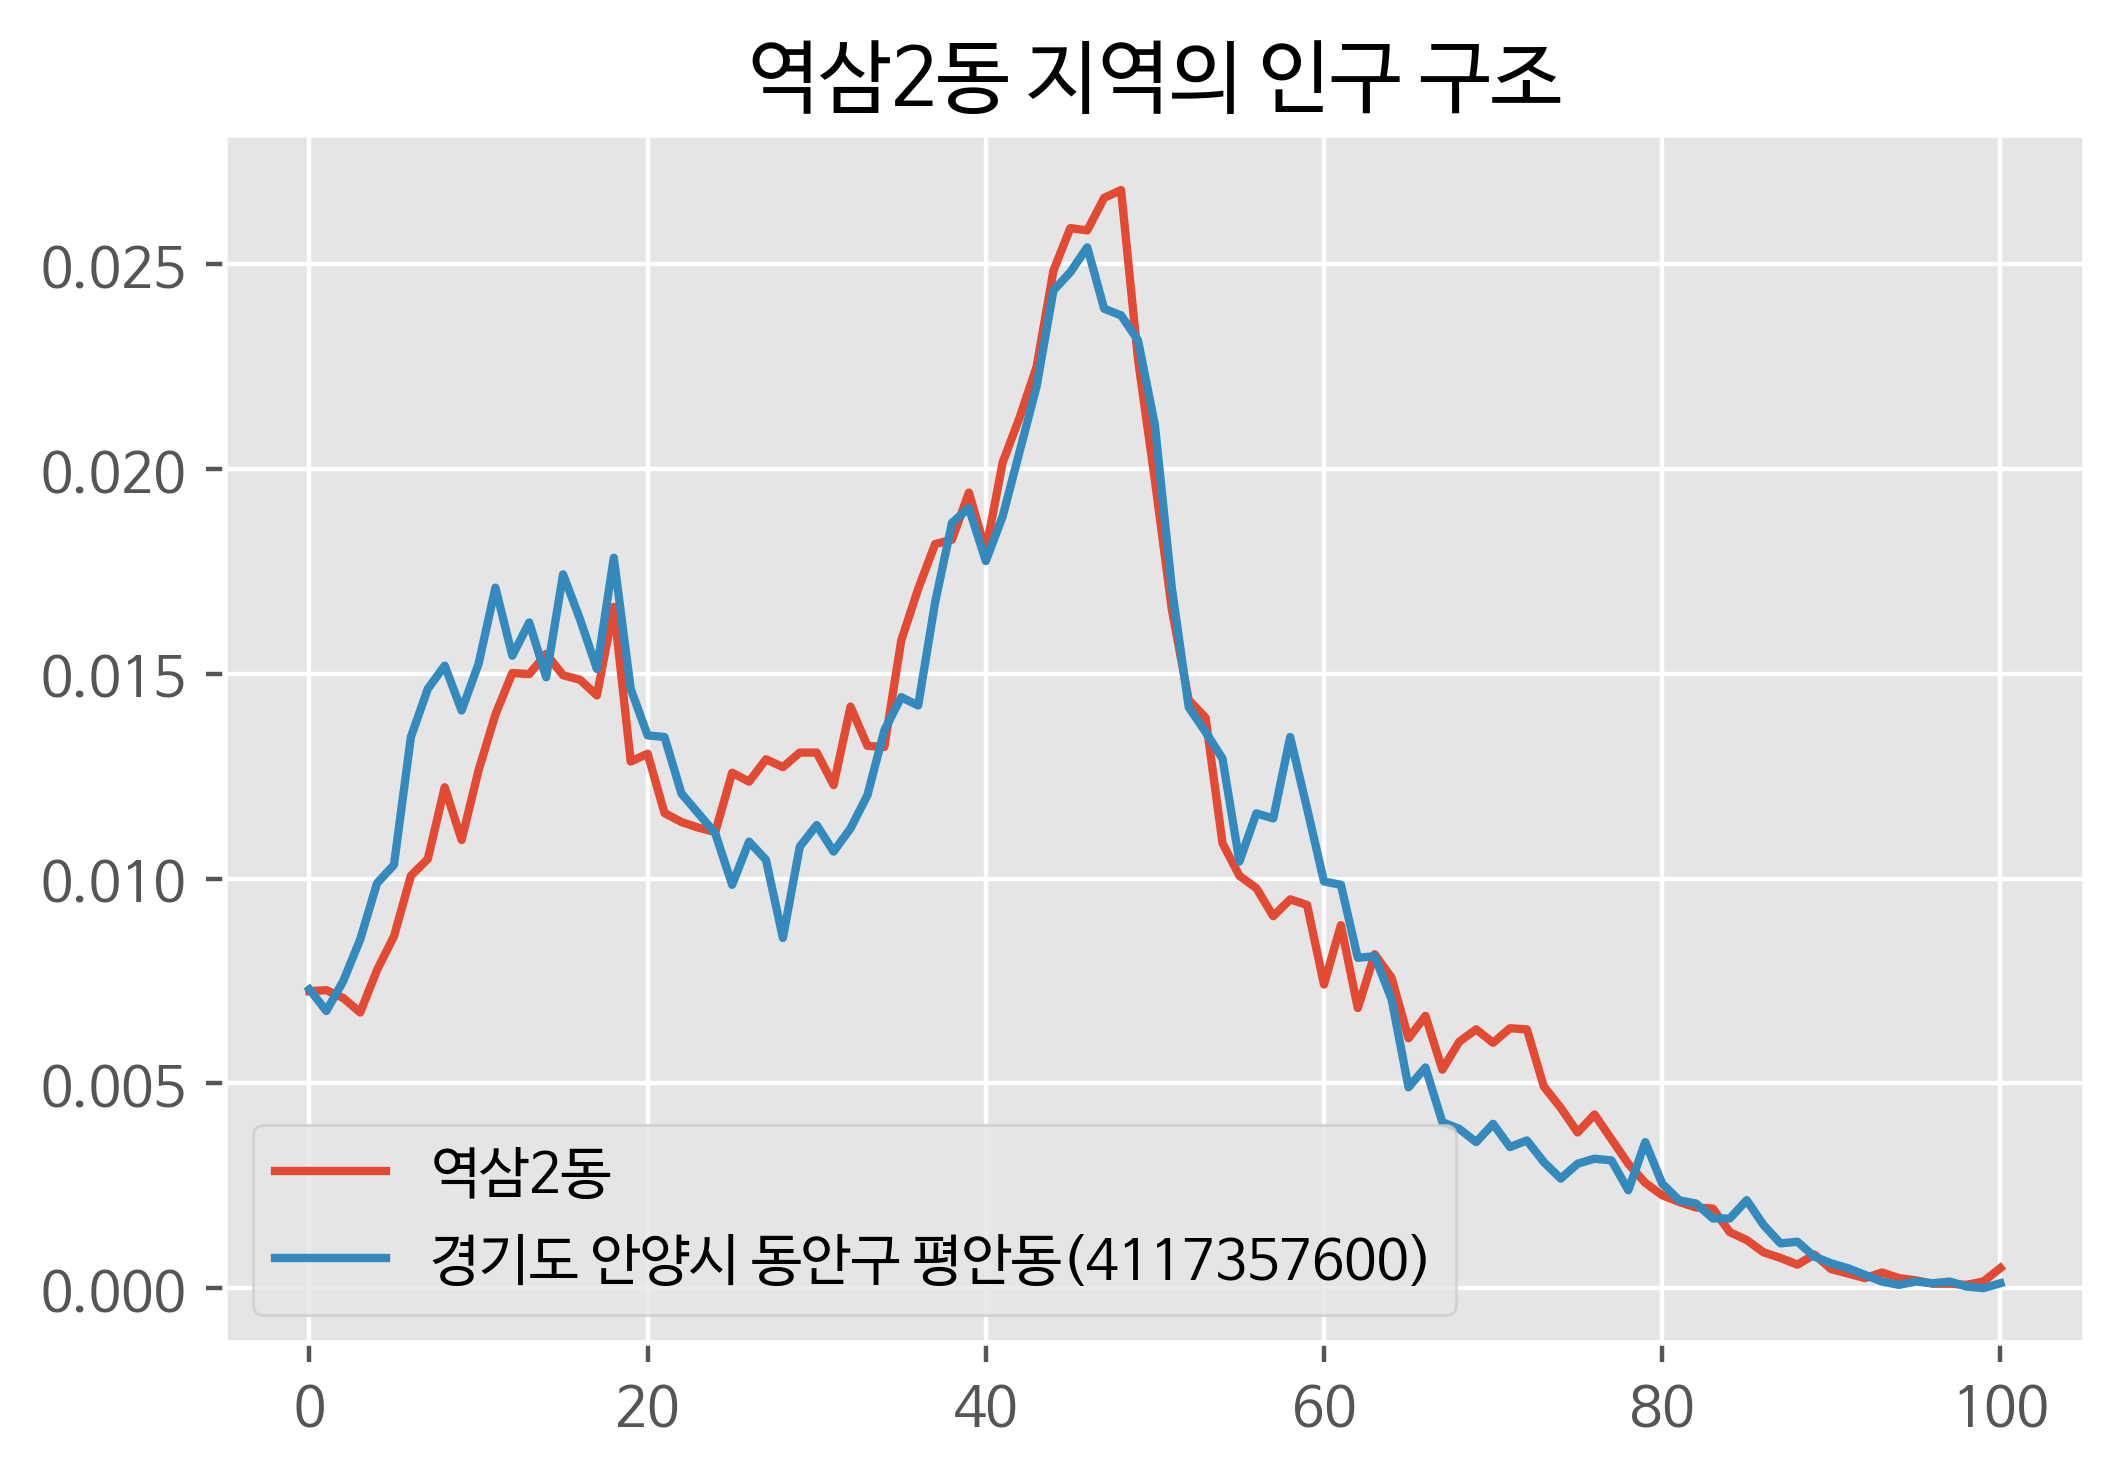

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt

f= open('age.csv', encoding='cp949')

data = csv.reader(f)
next(data) # 헤더 제거

data = list(data)  #추가

name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : ')

mn = 1
result_name = '' # 최솟값을 갖는 지역의 이름 저장할 변수 생성 및 초기화
result =0  # 최솟값을 갖는 지역의 연령대별 인구 비율 저장 할 변수 생성 및 초기화


for row in data:
  if name in row[0]:
    home = np.array(row[3:], dtype=int) / int(row[2])

for row in data:
  away = np.array(row[3:], dtype=int) / int(row[2])
  s = np.sum((home-away)**2) # 음수 -> 양수로 변환
  if s<mn and name not in row[0]:
    mn=s
    result_name=row[0]
    result = away # 인구 비율 저장

 #데이터 시각화
plt.style.use('ggplot')
plt.figure(dpi=200)
plt.rc('font', family = 'NanumBarunGothic')
plt.title(name + ' 지역의 인구 구조')
plt.plot(home, label =name)
plt.plot(result, label =result_name)
plt.legend()
plt.show()